In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "F:\\ME_3rdsem\\project\\PA\\dataset\\train"
validation_dir = "F:\\ME_3rdsem\\project\\PA\\dataset\\test"
tf.__version__

'2.5.0'

In [5]:

# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(validation_dir,
                                            target_size = (64, 64),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 564 images belonging to 3 classes.
Found 234 images belonging to 3 classes.


In [6]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


## for mulitclassification
cnn.add(Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [7]:
# Part 3 - Training the CNN

# Compiling the CNN
#cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
29/29 [==============================] - 8s 275ms/step - loss: 1.2567 - accuracy: 0.5727 - val_loss: 1.8083 - val_accuracy: 0.0171
Epoch 2/15
29/29 [==============================] - 8s 262ms/step - loss: 0.9694 - accuracy: 0.8103 - val_loss: 2.0149 - val_accuracy: 0.0000e+00
Epoch 3/15
29/29 [==============================] - 7s 261ms/step - loss: 0.9368 - accuracy: 0.8191 - val_loss: 1.9084 - val_accuracy: 0.0342
Epoch 4/15
29/29 [==============================] - 8s 265ms/step - loss: 0.9260 - accuracy: 0.8280 - val_loss: 1.9932 - val_accuracy: 0.0128
Epoch 5/15
29/29 [==============================] - 8s 291ms/step - loss: 0.9111 - accuracy: 0.8280 - val_loss: 1.9887 - val_accuracy: 0.0128
Epoch 6/15
29/29 [==============================] - 8s 266ms/step - loss: 0.9102 - accuracy: 0.8298 - val_loss: 2.0048 - val_accuracy: 0.0000e+00
Epoch 7/15
29/29 [==============================] - 8s 280ms/step - loss: 0.9048 - accuracy: 0.8298 - val_loss: 1.9776 - val_accuracy: 0.017

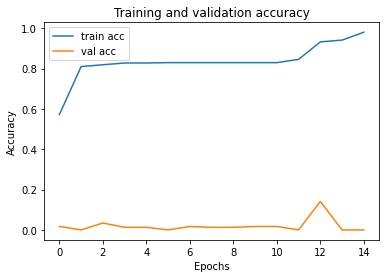

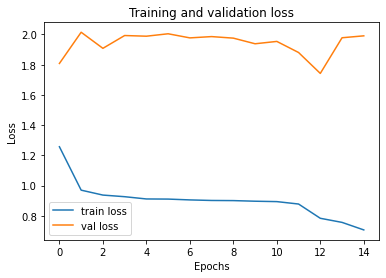

<Figure size 432x288 with 0 Axes>

In [8]:

import matplotlib.pyplot as plt

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and validation accuracy')
plt.xlabel('Epochs'),plt.ylabel('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('Training and validation loss')
plt.xlabel('Epochs'),plt.ylabel('Loss')
plt.show()
plt.savefig('LossVal_loss')


In [9]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('F:\\ME_3rdsem\\project\\PA\\dataset\\test\\goodweld\\frame_01032.png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [10]:
result

array([[0.01094511, 0.98597103, 0.00308386]], dtype=float32)

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('F:\\ME_3rdsem\\project\\PA\\dataset\\test\\contamination\\frame_01838.png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [12]:
result

array([[9.9950171e-01, 4.9826241e-04, 3.4529812e-08]], dtype=float32)

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('F:\\ME_3rdsem\\project\\PA\\dataset\\test\\IF\\frame_00873.png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [14]:
result

array([[2.4569582e-09, 2.9542496e-05, 9.9997044e-01]], dtype=float32)